# <b>Task</b><br>
1. Menetukan Hasil Prediksi Harga Laptop 
2. Split Data Jadi 80 Train 20 Test

## 1. Data Preparation

#### 1.1 Data Extraction

1.1.1 Import Library

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1.1.2 Load Data

In [119]:
df = pd.read_csv('Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


#### 1.2 Data Cleaning

1.2.1 Melihat Nilai Nan

In [120]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

1.2.2 Melihat Tipe data

In [121]:
df.dtypes

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

1.2.3 Cek Unique Value

In [122]:
for col in df.columns :
    unique = df[col].unique()
print(f"unique value di {col} : {unique}")

unique value di Price : [17395.09306456 31607.60591927  9291.02354234 17436.72833421
 32917.99071817  9543.71998013 10390.13731922  9214.484506
 16372.17528387 18501.83273321 31967.60763154 18534.10862992
 17495.98363759  9731.98241527  9831.38996154 11038.92812561
  8971.51250475 10915.05717304  9637.8916382   9593.11059218
 31965.35660981 32025.83668902 32764.27443119 32114.82080257
  9929.51435597 31623.81422968  9264.93397747 31549.79984535
 16729.55087503 31747.60460558 32817.51657673 10605.76645913
 32810.02391415 17059.6092753   8973.58968597  9912.49162465
 32801.64628031 10174.1952073  10325.36473274  9221.13843469
 10233.78582224 10333.32156042 10781.53920121 18167.29982925
 31381.40554801 17124.2200747   9280.14242169  9701.08881845
 31673.69622669 17493.65015748 31339.1597419  18495.1809748
  9140.17044755 33151.04094221 31612.05196825  9081.89873792
 31650.73014951 17076.68132856 16983.63602188 17283.37600788
 16788.66859569 10029.58176691 31879.66275681 17008.98570634
  9

1.2.4 Cek Jumlah Data yang Terduplikasi

In [123]:
df.duplicated().sum()

0

#### 1.3 Data Transform

1.3.1 Melihat Unique Value dari Kolom Brand

In [124]:
df['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

1.3.2 Mengubah Value Kolom Brand dengan Fungsi Replace

In [125]:
df['Brand'] = df['Brand'].replace('Asus', 1)
df['Brand'] = df['Brand'].replace('Acer', 2)
df['Brand'] = df['Brand'].replace('Lenovo', 3)
df['Brand'] = df['Brand'].replace('HP', 4)
df['Brand'] = df['Brand'].replace('Dell', 5)
df.dtypes

Brand                 int64
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

## 2. Explorytion Data Analys (EDA)

#### 2.1 Data Preprocessing

2.1.1 Visualisasi Heatmap untuk Melihat Korelasi Antar Variabel

<Axes: >

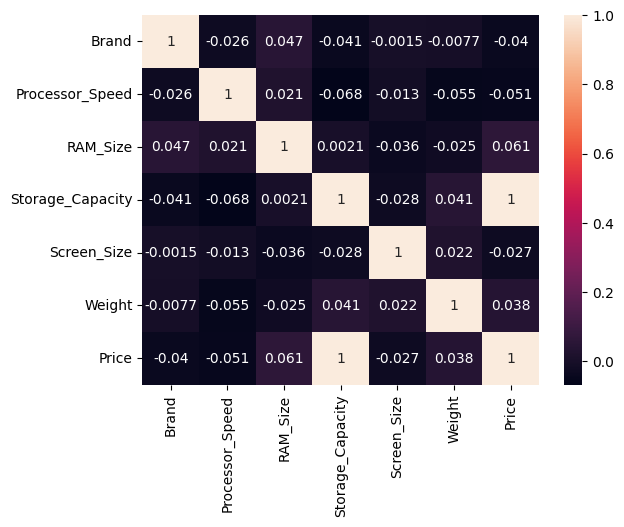

In [126]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

2.1.2 Membuat Kolom Baru dengan Nama Storage

In [127]:
df['Storage'] = df['RAM_Size']+df['Storage_Capacity']+df['Processor_Speed']

2.1.3 Membuat Kolom Baru dengan Nama Laptop

In [128]:
df['Laptop'] = df['Storage']*df['Screen_Size']+df['Brand']

In [129]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Storage,Laptop
0,1,3.830296,16,512,11.185147,2.641094,17395.093065,531.830296,5949.600263
1,2,2.912833,4,1000,11.311372,3.260012,31607.605919,1006.912833,11391.565421
2,3,3.241627,4,256,11.853023,2.029061,9291.023542,263.241627,3123.208976
3,2,3.806248,16,512,12.280360,4.573865,17436.728334,531.806248,6532.772228
4,2,3.268097,32,1000,14.990877,4.193472,32917.990718,1035.268097,15521.576869
...,...,...,...,...,...,...,...,...,...
995,4,3.343584,4,1000,12.587095,3.162399,31593.668017,1007.343584,12683.529217
996,5,2.780555,8,256,12.679356,3.750265,9149.521832,266.780555,3387.605605
997,5,3.200569,4,512,12.666315,3.392612,16552.404779,519.200569,6581.357714
998,1,1.604182,8,256,11.215581,3.857613,9407.473459,265.604182,2979.905245


2.1.4 Melakukan normalisasi pada kolom yang digunakan

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Brand'),
  Text(1, 0, 'Processor_Speed'),
  Text(2, 0, 'RAM_Size'),
  Text(3, 0, 'Storage_Capacity'),
  Text(4, 0, 'Screen_Size'),
  Text(5, 0, 'Weight'),
  Text(6, 0, 'Price'),
  Text(7, 0, 'Storage'),
  Text(8, 0, 'Laptop')])

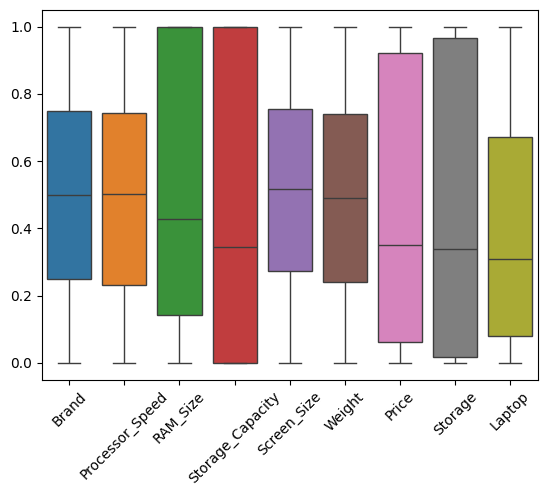

In [130]:
df_nom = (df - df.min()) / (df.max() - df.min())
sns.boxplot(df_nom)
plt.xticks(rotation=45)

In [131]:
# sns.barplot(x=df['Laptop'],y=df['Price'])
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

## 3. Pemodelan Data

#### 3.1 Define ALgorithm

3.1.1 Deklarasi x dan y

In [132]:
x = df_nom['Laptop'].values.reshape(-1, 1)
y = df_nom['Price'].values

#### 3.2 Train Test Split 

3.2.1 Split Data Menjadi 80% training dan 20% Test

In [133]:
np.random.seed(42)

# memilih untuk test
num_samples = len(df_nom)
num_test_samples = int(0.2 * num_samples) # 0.2 itu test size e 
test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False) #kalo ga di replcae maka indeks bisa muncul 2 kali di 1 data

# membuat var train untuk memisahkan data test dan train
data_len = np.ones(num_samples, dtype=bool) # mengubah bool untuk dipisah di line berikutnya
data_len[test_indices] = False # jadi mask nilai true masuk ke training dan false masuk ke test

# Membagi data menjadi train dan test 
X_train, X_test = x[data_len], x[~data_len]
y_train, y_test = y[data_len], y[~data_len]


3.2.2 Modelling Menggunakan Simple Linear Regression

In [134]:
x_bar = X_train.mean()
y_bar = y_train.mean()
def calculate_theta(x,y):
    n = len(x)
    pembilang = sum((x[i] -x_bar)*(y[i]-y_bar) for i in range(n))
    penyebut = sum((x[i] - x_bar)**2 for i in range(n))

    theta_1 = pembilang /penyebut
    theta_0 = y_bar - theta_1*x_bar

    return theta_0, theta_1

theta_0, theta_1 = calculate_theta(X_train,y_train)

print('theta_1 = ', theta_1)
print('theta_0 = ', theta_0)

def prediksi(x, theta_0, theta_1):
    y = theta_0 + sum(theta_1[i] * x[:, i] for i in range(len(theta_1)))
    return y

y_pred = prediksi(X_train, theta_0, theta_1)
y_pred

r2 = 1 - sum((y_train - y_pred)**2) / sum((y_train - y_bar)**2)
mse = np.mean((y_pred - y_train)**2)
print('r2', r2)
print('mse', mse)

theta_1 =  [1.17388412]
theta_0 =  [-0.0006512]
r2 0.9292797800494864
mse 0.00998431701412568


#### 3.3 Algorithm Used

3.3.1 Menggunakan Rumus Simple Linear Regression untuk Memprediksi Data Test 

In [135]:
def prediksi(x,y):
    x_bar = x.mean()
    y_bar = y.mean()
    n = len(x)
    pembilang = sum((x[i] -x_bar)*(y[i]-y_bar) for i in range(n))
    penyebut = sum((x[i] - x_bar)**2 for i in range(n))

    theta_1_ = pembilang /penyebut
    theta_0_ = y_bar - theta_1_*x_bar

    y_pred_ = theta_0_ + sum(theta_1_[i] * x[:, i] for i in range(len(theta_1_)))
    r2_ = 1 - sum((y - y_pred_)**2) / sum((y - y_bar)**2)
    mse_ = np.mean((y_pred_ - y)**2)

    print('theta_1 = ', theta_1_)
    print('theta_0 = ', theta_0_)
    print('r2', r2_)
    print('mse', mse_)
    return theta_0_, theta_1_, y_pred_,r2_,mse_

theta_0_, theta_1_, y_pred_,r2_,mse_ = prediksi(X_test, y_test)


theta_1 =  [1.18456387]
theta_0 =  [-0.00495088]
r2 0.9400808445554318
mse 0.008750922522930466


3.3.2 Memprediksi Data Baru

In [136]:
def prediksi(x, theta_0, theta_1):
    y = theta_0 + sum(theta_1[i] * x[i] for i in range(len(theta_1)))
    return y

new_data = [5949]
prediksi_value = prediksi(new_data, theta_0, theta_1)
prediksi_value

array([6983.43598762])

## 4. Evaluasi Model Prediksi

#### 4.1 Hasil Akurasi

4.1.1 Perbandingan Hasil Akurasi pada Data Train dan Data Test

In [137]:
print('r2 train = ', r2)
print('mse train = ', mse)
print('='*34)
print('r2 test = ', r2_)
print('mse test =', mse_)

r2 train =  0.9292797800494864
mse train =  0.00998431701412568
r2 test =  0.9400808445554318
mse test = 0.008750922522930466


#### 4.2 Visualisasi Akurasi

4.2.1 Visualisasi Histogram

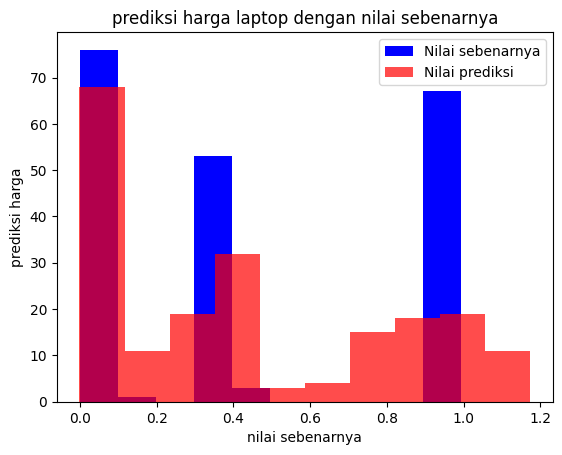

In [138]:
plt.hist(y_test, color='blue', label='Nilai sebenarnya')
plt.hist(y_pred_, color='red', alpha=0.7, label='Nilai prediksi')
plt.ylabel('prediksi harga')
plt.xlabel('nilai sebenarnya')
plt.title('prediksi harga laptop dengan nilai sebenarnya')
plt.legend()
plt.show()

4.2.2 Visualisasi menggunakan scatter plot

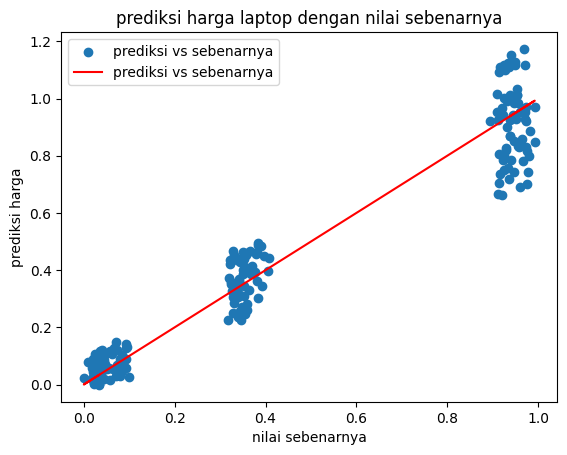

In [139]:
plt.scatter(y_test, y_pred_, label='prediksi vs sebenarnya')
plt.plot(y_test, y_test, color='red', label='prediksi vs sebenarnya')
plt.ylabel('prediksi harga')
plt.xlabel('nilai sebenarnya')
plt.title('prediksi harga laptop dengan nilai sebenarnya')
plt.legend()
plt.show()